In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
corr = df.corr()
df.corr()# Compute the correlation matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


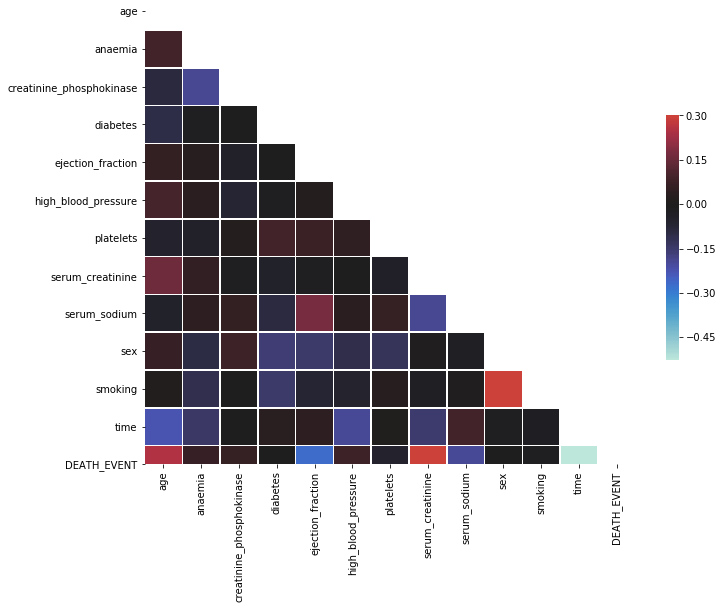

In [5]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

PEOPLE WHO SUFFER AN ATTACK
         Female  Male
smoking      66    30
PEOPLE WHO WERE SURVEYED
     Male  Female
sex   194     105


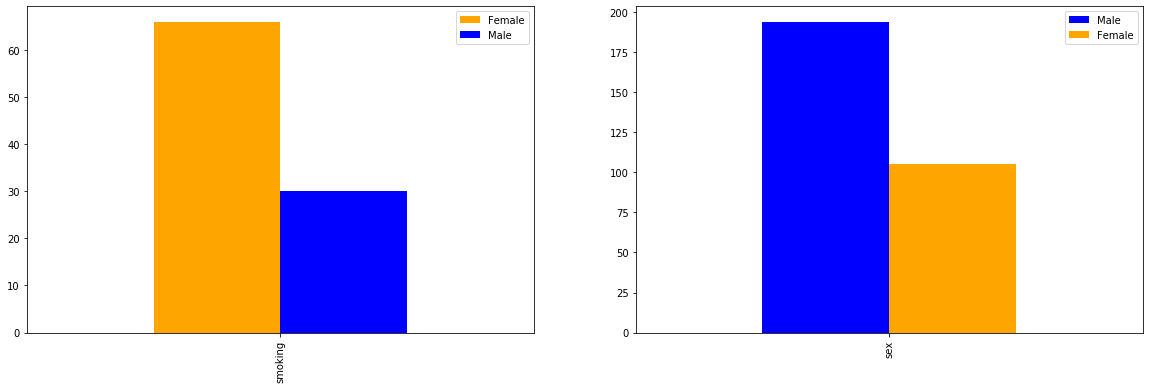

In [6]:
fig,axs = plt.subplots(1,2,figsize = (20,6))
smoking = df['smoking'].where(df['DEATH_EVENT'] == 1).value_counts().to_frame().transpose()
smoking_total = df['sex'].value_counts().to_frame().transpose()
smoking.rename(columns = {0:'Female', 1:'Male'},inplace = True)
smoking_total.rename(columns = {0:'Female', 1:'Male'},inplace = True)
smoking.plot(kind = 'bar',ax = axs[0],color = ['Orange','Blue'])
print('PEOPLE WHO SUFFER AN ATTACK')
print(smoking)
smoking_total.plot(kind = 'bar',ax = axs[1],color = ['Blue','orange'])
print('PEOPLE WHO WERE SURVEYED')
print(smoking_total)

In [8]:
y = df["sex"]
X = df.drop(columns=["sex"])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (239, 12) (239,)
Test set: (60, 12) (60,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C = 0.5, solver='newton-cg').fit(X_train,y_train)

In [10]:
yhat = LR.predict(X_test)
print(yhat)
yhat_prob = LR.predict_proba(X_test)
print(yhat_prob)

[1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0]
[[0.23092071 0.76907929]
 [0.05968541 0.94031459]
 [0.05361181 0.94638819]
 [0.12999116 0.87000884]
 [0.62187395 0.37812605]
 [0.42534701 0.57465299]
 [0.53084976 0.46915024]
 [0.40289572 0.59710428]
 [0.53353748 0.46646252]
 [0.42678702 0.57321298]
 [0.23770781 0.76229219]
 [0.16266519 0.83733481]
 [0.6183666  0.3816334 ]
 [0.69746987 0.30253013]
 [0.16885869 0.83114131]
 [0.5837171  0.4162829 ]
 [0.16003374 0.83996626]
 [0.41119138 0.58880862]
 [0.53796447 0.46203553]
 [0.34682831 0.65317169]
 [0.63867665 0.36132335]
 [0.25027658 0.74972342]
 [0.5523806  0.4476194 ]
 [0.28295357 0.71704643]
 [0.633707   0.366293  ]
 [0.54190409 0.45809591]
 [0.20624147 0.79375853]
 [0.05610489 0.94389511]
 [0.71575654 0.28424346]
 [0.11705768 0.88294232]
 [0.13566559 0.86433441]
 [0.11825417 0.88174583]
 [0.17691773 0.82308227]
 [0.55362012 0.44637988]
 [0.38458194 0.61541806]
 [

In [11]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
print('The Log Loss is: ' + str(log_loss(y_test, yhat_prob)))
print('Jaccard Similarity Score is : ' + str(jaccard_score(y_test, yhat)))
print('F1 Score is : ' + str(f1_score(y_test,yhat)))

The Log Loss is: 0.5145576929834561
Jaccard Similarity Score is : 0.62
F1 Score is : 0.7654320987654322


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.50      0.53      0.51        19
           1       0.78      0.76      0.77        41

    accuracy                           0.68        60
   macro avg       0.64      0.64      0.64        60
weighted avg       0.69      0.68      0.69        60



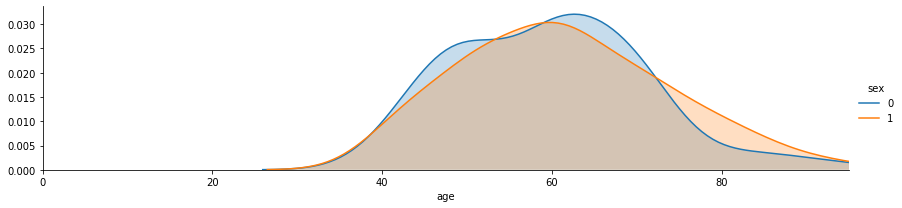

In [13]:
fig = sns.FacetGrid(df, hue="sex", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = df['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

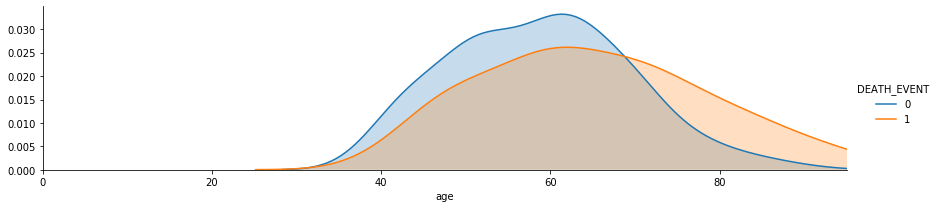

In [14]:
fig = sns.FacetGrid(df, hue="DEATH_EVENT", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = df['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()